<a href="https://colab.research.google.com/github/10K920/MNIST-Classifier-RandomForest/blob/main/MNIST_Classifier_with_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# Add import statements here
# Collaborators: Won Young Kang, Chang Hi Lee
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import genfromtxt as gft
import random

In [ ]:
# To access files in your Google Drive, run this block and follow the instructions
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# To test if the above block worked, run this block
!ls '/content/gdrive/My Drive/'

## Neural Network

The `neural_network` function creates a model that learns to classify handwritten digits.

Inputs:
* `X_train` is the training data
* `y_train` are the training labels
* `X_test` is the testing data
* `y_test` are the testing labels

Outputs: 
* `test_loss` is the loss after evaluating the testing dataset
* `test_acc` is the accuracy after evaluating the testing dataset
* `predictions` are the models predictions of the testing dataset

Note: Have fun and be creative with this assignment!


In [ ]:
def neural_network(x_train, y_train, x_test, y_test):

  # Implement model
  '''
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256, activation="relu"))
  model.add(tf.keras.layers.Dense(128, activation="relu"))
  model.add(tf.keras.layers.Dense(64, activation="relu"))
  model.add(tf.keras.layers.Dense(10))
  '''

  modelC = tf.keras.Sequential()
  modelC.add(tf.keras.layers.Flatten())
  modelC.add(tf.keras.layers.Dense(256, activation="relu"))
  modelC.add(tf.keras.layers.Dense(128, activation="relu"))
  modelC.add(tf.keras.layers.Dense(64, activation="relu"))
  modelC.add(tf.keras.layers.Dense(10, activation="softmax"))

  # Feel free to change this up, but leave it at first
  '''
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  
  # Fit and evaluate
  model.fit(
      x_train, y_train, batch_size=None, epochs=10, verbose=1, callbacks=None,
      validation_split=0.0, validation_data=(x_test,y_test), shuffle=True, class_weight=None,
      sample_weight=None, initial_epoch=0, steps_per_epoch=None,
      validation_steps=None, validation_batch_size=None, validation_freq=1,
      max_queue_size=10, workers=1, use_multiprocessing=False
  )
  '''

  modelC.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  
  # Fit and evaluate
  modelC.fit(
      x_train, y_train, batch_size=None, epochs=10, verbose=1, callbacks=None,
      validation_split=0.0, validation_data=(x_test,y_test), shuffle=True, class_weight=None,
      sample_weight=None, initial_epoch=0, steps_per_epoch=None,
      validation_steps=None, validation_batch_size=None, validation_freq=1,
      max_queue_size=10, workers=1, use_multiprocessing=False
  )
  
  test_loss, test_acc = modelC.evaluate(
    x_train, y_train, batch_size=None, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
  )
  

  # Calculate predictions
  
  predictions = modelC.predict(x_test)

  return test_loss, test_acc, predictions

## Run and Plot

Run your neural network code and plot figures below

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3806 - accuracy: 0.8875 - val_loss: 0.1249 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0921 - accuracy: 0.9715 - val_loss: 0.0972 - val_accuracy: 0.9707
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0613 - accuracy: 0.9804 - val_loss: 0.0793 - val_accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0439 - accuracy: 0.9860 - val_loss: 0.0766 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0992 - val_accuracy: 0.9711
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0763 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - l

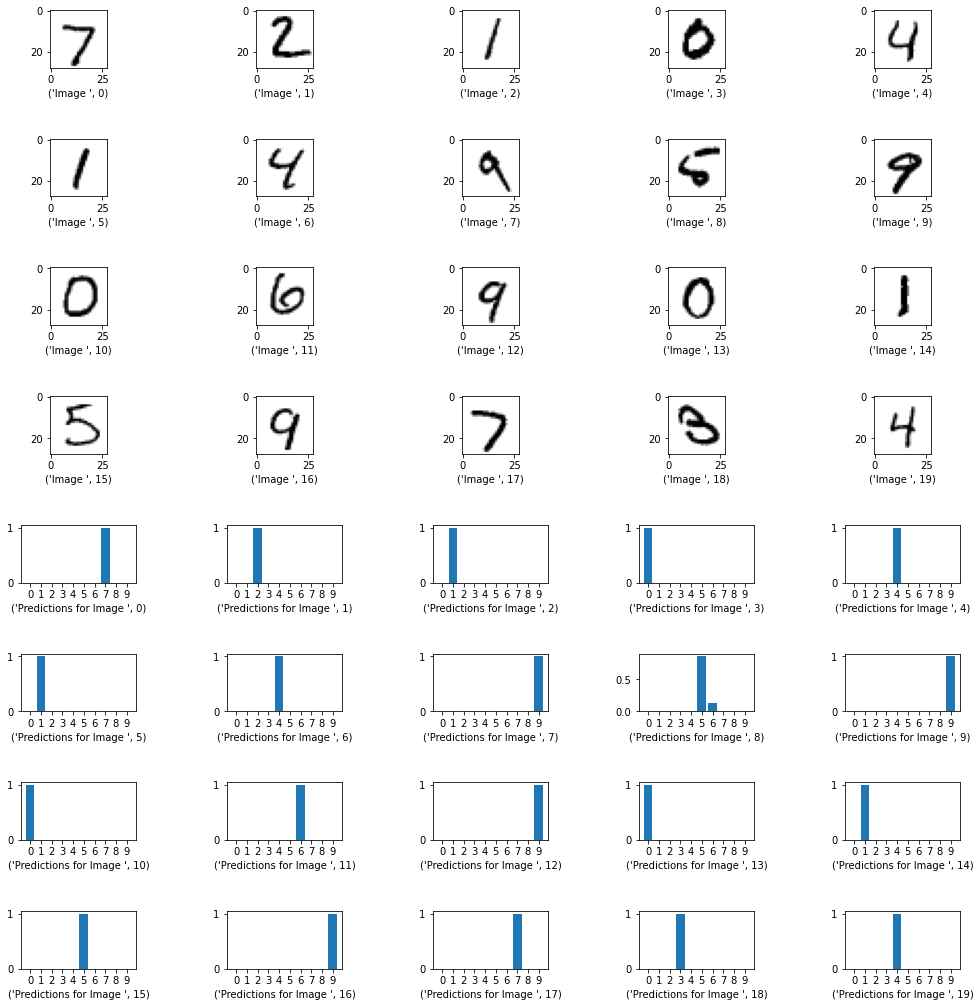

In [ ]:
# Other neural network code here:

# Load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale
x_train = x_train/255.0
x_test = x_test/255.0



fig, ax = plt.subplots(8,5,figsize=(15,15))
fig.tight_layout(pad=5.0)


ax = ax.flatten()
for i in range(20):
  test_images = x_test[i]
  ax[i].imshow(test_images, cmap='gray_r')
  plt.sca(ax[i])
  plt.xlabel(("Image ", i))


test_loss, test_acc, predictions = neural_network(x_train, y_train, x_test, y_test)

print(test_loss)
print(test_acc)
print(predictions)

x_axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
index = np.arange(len(x_axis))


for i in range(20, 40):
  plt.sca(ax[i])
  plt.xticks(index, x_axis)
  plt.xlabel(("Predictions for Image ", i-20))
  ax[i].bar(x_axis, predictions[i-20])

## Random Forest

The `random_forest` function learns an ensemble of numBags CART decision trees using a random subset of the features at each split on the input dataset and also plots the  out-of-bag error as a function of the number of bags

Inputs:
* `X_train` is the training data
* `y_train` are the training labels
* `X_test` is the testing data
* `y_test` are the testing labels
* `num_bags` is the number of trees to learn in the ensemble
* `m` is the number of randomly selected features to consider at each split

Outputs: 
* `out_of_bag_error` is the out-of-bag classification error of the final learned ensemble
* `test_error` is the classification error of the final learned ensemble on test data

Note: You may use sklearns 'DecisonTreeClassifier' but **not** 'RandomForestClassifier' or any other bagging function



In [ ]:
#bootstraps a given dataset with N samples drawn
#returns a tuple (X_boot, Y_boot, excluded), where X_boot and Y_boot are bootstrapped datasets 
#and excluded is the excluded rows used for bagging
def bootstrap(X, y):
  #N = len(Y)
  row = X.shape[0] #number of rows equals N
  col = X.shape[1] 

  included = np.random.choice(row, row, replace=True)
  excluded = []
  for i in range(row):
    if i not in included:
      excluded.append(i)
  
  X_boot = np.zeros((row, col))
  y_boot = np.zeros(row)

  for j in range(row):
    included_row = included[j]
    X_boot[j,:] = X[included_row, :]
    y_boot[j] = y[included_row]


  return (X_boot, y_boot, excluded)

In [ ]:
def random_forest(X_train, y_train, X_test, y_test, num_bags, m):

  # Your code here, assign the proper values to out_of_bag_error and test_error:
  clf = DecisionTreeClassifier(max_features=m)
  clf_boot = clf
  clf_oob = clf
  error = 0
  #counter = 0
  out_of_bag_error = 0
  test_error = 0
  row_train = X_train.shape[0]
  col_train = X_train.shape[1]
  row_test = X_test.shape[0]
  col_test = X_test.shape[1]

  #prediction = np.zeros(col_test)
  #ps = 0

  for i in range(num_bags):
    X_boot, y_boot, excluded = bootstrap(X_train, y_train)
    #print(f'y_boot: {y_boot}')
    clf_boot = clf_boot.fit(X_boot, y_boot) #train copy of model with bootstrapped data
    excluded_num = len(excluded)
    X_excluded = np.zeros((excluded_num, col_train))
    y_excluded = np.zeros(excluded_num)
    for ii in range(excluded_num):
      excluded_row = excluded[ii]
      X_excluded[ii] = X_train[excluded_row, :]
      y_excluded[ii] = y_train[excluded_row]
    clf_oob = clf_oob.fit(X_excluded, y_excluded) #train copy of model of oob validation

  for j in range(row_train):
    prediction_oob = clf_oob.predict([X_train[j, :]])[0]
    if int(prediction_oob) != y_train[j]:
      out_of_bag_error += 1
  
  for k in range(row_test):
    prediction_test = clf_boot.predict([X_test[k, :]])[0]
    if int(prediction_test) != y_test[k]:
      test_error += 1
  
  return float(out_of_bag_error)/float(row_train), float(test_error)/float(row_test)

## Run and Plot

Run your random forest code and plot figures below

In [ ]:
# Other random forest code here:
train_data = np.genfromtxt('/content/gdrive/My Drive/zip_train.csv', delimiter=',')
test_data = np.genfromtxt('/content/gdrive/My Drive/zip_test.csv', delimiter=',')

row_train = train_data.shape[0]
col_train = train_data.shape[1]

X_train = train_data[1:row_train,0:col_train-2]
y_train = train_data[1:row_train, col_train-1]

for i in range(len(y_train)):
  y_train[i] = int(y_train[i])

row_test = test_data.shape[0]
col_test = test_data.shape[1]

X_test = test_data[1:row_test-1,0:col_test-2]
y_test = test_data[1:row_test-1, col_test-1]
for i in range(len(y_test)):
  y_test[i] = int(y_test[i])

train_data_1 = [np.zeros(col_train)]
train_data_2 = [np.zeros(col_train)]
test_data_1 = [np.zeros(col_test)]
test_data_2 = [np.zeros(col_test)]

m = int(col_train/3)

##-----(b)-----
#num_bags = 200
# for i in range(len(train_data)):
#   if (train_data[i][0] == 1 or train_data[i][0] == 3):
#     train_data_1 = np.append(train_data_1, [train_data[i]], axis=0)

#   if (train_data[i][0] == 3 or train_data[i][0] == 5):
#     train_data_2 = np.append(train_data_2, [train_data[i]], axis=0)

# for i in range(len(test_data)):  
#   if (test_data[i][0] == 1 or test_data[i][0] == 3):
#     test_data_1 = np.append(test_data_1, [test_data[i]], axis=0)

#   if (test_data[i][0] == 3 or test_data[i][0] == 5):
#     test_data_2 = np.append(test_data_2, [test_data[i]], axis=0)

# row_train_1 = train_data_1.shape[0]
# col_train_1 = train_data_1.shape[1]
# X_train_1 = train_data_1[1:row_train_1,0:col_train_1-2]
# y_train_1 = train_data_1[1:row_train_1, col_train_1-1]
# row_test_1 = test_data_1.shape[0]
# col_test_1 = test_data_1.shape[1]
# X_test_1 = test_data_1[1:row_test_1,0:col_test-2]
# y_test_1 = test_data_1[1:row_test_1, col_test-1]
# out_of_bag_error1, test_error1 = random_forest(X_train_1, y_train_1, X_test_1, y_test_1, num_bags, m)

# row_train_2 = train_data_2.shape[0]
# col_train_2 = train_data_2.shape[1]
# X_train_2 = train_data_2[1:row_train_2,0:col_train_2-2]
# y_train_2 = train_data_2[1:row_train_2, col_train_2-1]
# row_test_2 = test_data_2.shape[0]
# col_test_2 = test_data_2.shape[1]
# X_test_2 = test_data_2[1:row_test_2,0:col_test_2-2]
# y_test_2 = test_data_2[1:row_train_2, col_test_2-1]
# out_of_bag_error2, test_error2 = random_forest(X_train_2, y_train_2, X_test_2, y_test_2, num_bags, m)

# print(f'When num_bags is set to 200: ')
# print(f'oob_error_1: {out_of_bag_error1}')
# print(f'test_error_1: {test_error1}')
# print(f'oob_error_2: {out_of_bag_error2}')
# print(f'test_error_2: {test_error2}')


# print("train_data: ", train_data.shape)
# print("train_data_1: ", train_data_1.shape)
# print("train_data_2: ", train_data_2.shape)

##-----(a)-----
num_bags_range = np.linspace(1, 200, num=10)
num_bags_range = np.arange(1, 201, 10)
num_bags_range = [25, 50, 75, 100, 125, 150, 175, 200]
oob1 = []
oob2 = []

for num_bags in num_bags_range:
  for i in range(len(train_data)):
    if (train_data[i][0] == 1 or train_data[i][0] == 3):
      train_data_1 = np.append(train_data_1, [train_data[i]], axis=0)

    if (train_data[i][0] == 3 or train_data[i][0] == 5):
      train_data_2 = np.append(train_data_2, [train_data[i]], axis=0)

  for i in range(len(test_data)):  
    if (test_data[i][0] == 1 or test_data[i][0] == 3):
      test_data_1 = np.append(test_data_1, [test_data[i]], axis=0)

    if (test_data[i][0] == 3 or test_data[i][0] == 5):
      test_data_2 = np.append(test_data_2, [test_data[i]], axis=0)

  row_train_1 = train_data_1.shape[0]
  col_train_1 = train_data_1.shape[1]
  X_train_1 = train_data_1[1:row_train_1,0:col_train_1-2]
  y_train_1 = train_data_1[1:row_train_1, col_train_1-1]
  row_test_1 = test_data_1.shape[0]
  col_test_1 = test_data_1.shape[1]
  X_test_1 = test_data_1[1:row_test_1,0:col_test-2]
  y_test_1 = test_data_1[1:row_test_1, col_test-1]
  out_of_bag_error1, test_error1 = random_forest(X_train_1, y_train_1, X_test_1, y_test_1, num_bags, m)
  oob1.append(out_of_bag_error1)

  row_train_2 = train_data_2.shape[0]
  col_train_2 = train_data_2.shape[1]
  X_train_2 = train_data_2[1:row_train_2,0:col_train_2-2]
  y_train_2 = train_data_2[1:row_train_2, col_train_2-1]
  row_test_2 = test_data_2.shape[0]
  col_test_2 = test_data_2.shape[1]
  X_test_2 = test_data_2[1:row_test_2,0:col_test_2-2]
  y_test_2 = test_data_2[1:row_train_2, col_test_2-1]
  out_of_bag_error2, test_error2 = random_forest(X_train_2, y_train_2, X_test_2, y_test_2, num_bags, m)
  oob2.append(out_of_bag_error2)

plt.figure(1)
data1, = plt.plot(num_bags_range, oob1, label = 'out_of_bag_error_1vs3')
data2, = plt.plot(num_bags_range, oob2, label = 'out_of_bag_error_3vs5')
plt.ylabel("OOB Error")
plt.xlabel("num_bags")
plt.title("OOB Errors, 1VS3 and 3VS5 Datasets")
plt.xlim(0, 220)
_=plt.legend(handles=[data1, data2])






OSError: ignored